In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, date, timedelta

In [2]:

end_date = datetime.now()
start_date = end_date - timedelta(365)


In [3]:
btcticker = yf.Ticker("BTC-USD")

In [4]:

btc = btcticker.history(start=start_date,end=end_date)

In [5]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-09-30 00:00:00+00:00,26911.689453,27091.794922,26888.968750,26967.916016,5331172801,0.0,0.0
2023-10-01 00:00:00+00:00,26967.396484,28047.238281,26965.093750,27983.750000,9503917434,0.0,0.0
2023-10-02 00:00:00+00:00,27976.798828,28494.458984,27347.787109,27530.785156,19793041322,0.0,0.0
2023-10-03 00:00:00+00:00,27508.251953,27667.191406,27216.001953,27429.978516,11407814187,0.0,0.0
2023-10-04 00:00:00+00:00,27429.074219,27826.658203,27248.105469,27799.394531,11143355314,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-24 00:00:00+00:00,63326.839844,64695.214844,62737.417969,64301.968750,29938335243,0.0,0.0
2024-09-25 00:00:00+00:00,64302.589844,64804.503906,62945.375000,63143.144531,25078377700,0.0,0.0
2024-09-26 00:00:00+00:00,63138.546875,65790.796875,62669.269531,65181.019531,36873129847,0.0,0.0


In [6]:
btcdata = btc['Close'].values.reshape(-1, 1)

In [7]:
## Close value price of BTC for last 365 days
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np


In [8]:


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btcdata)


look_back = 10


x_train, y_train = [], []


## need to understand this
for x in range(look_back,len(scaled_data)):
    x_train.append(scaled_data[x-look_back:x,0])
    y_train.append(scaled_data[x,0])

###


X, y = np.array(x_train), np.array(y_train)


X = X.reshape((X.shape[0], X.shape[1], 1))

In [9]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Manush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
history = model.fit(X, y, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - loss: 0.2330 - val_loss: 0.0071
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0306 - val_loss: 0.0056
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0167 - val_loss: 0.0197
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0187 - val_loss: 0.0061
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0140 - val_loss: 0.0057
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0092 - val_loss: 0.0071
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0075 - val_loss: 0.0061
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0108 - val_loss: 0.0056
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0077 - val_loss: 0.0056
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0088 - val_loss: 0.0059
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0083 - val_loss: 0.0054
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0085 - val_loss: 0.0054

In [11]:
split_ratio = 0.8
train_size = int(len(X) * split_ratio)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [12]:

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 361ms/step


In [13]:
preds = predictions.flatten()
actual = y_test_scaled.flatten()
trend = (preds > actual).astype(int)

result_df = pd.DataFrame({
    "Predection(for tommorrow)":preds,
    "Actual":actual,
    "trend":trend
})

result_df




,Predection(for tommorrow),Actual,trend
0,60697.125000,67163.648438,0
1,61557.625000,68154.523438,0
2,62465.328125,67585.250000,0
3,63293.660156,65927.671875,0
4,63908.816406,65372.132812,0
...,...,...,...
66,60501.722656,64301.968750,0
67,60929.687500,63143.144531,0
68,61333.773438,65181.019531,0
69,61798.023438,65790.664062,0


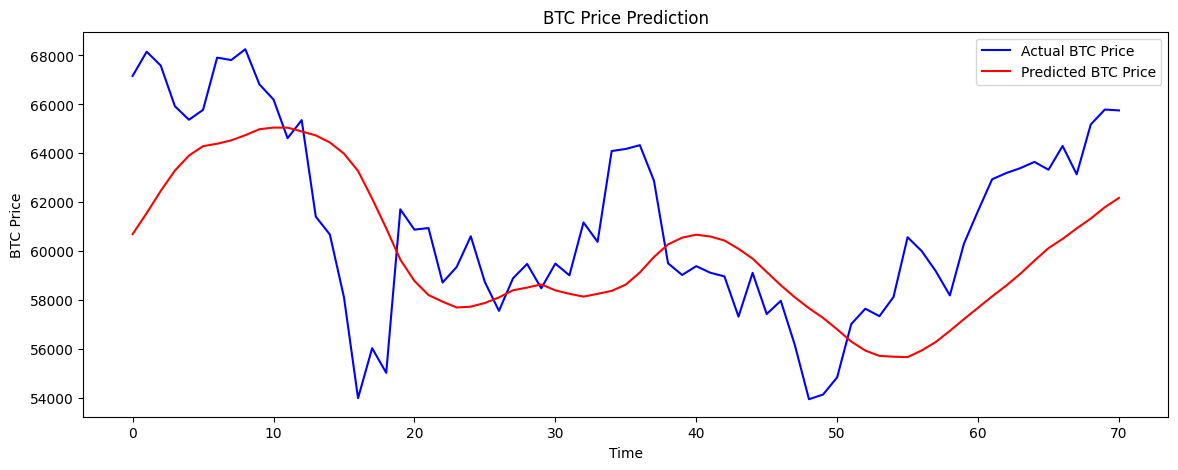

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.plot(y_test_scaled, color='blue', label='Actual BTC Price')
plt.plot(predictions, color='red', label='Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()

In [15]:
len(result_df)

71

In [16]:
result_df["trend"].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [17]:
from sklearn import metrics

results = metrics.r2_score(result_df["Actual"], result_df["Predection(for tommorrow)"])
results


0.1932557655736311

In [18]:
result_df

,Predection(for tommorrow),Actual,trend
0,60697.125000,67163.648438,0
1,61557.625000,68154.523438,0
2,62465.328125,67585.250000,0
3,63293.660156,65927.671875,0
4,63908.816406,65372.132812,0
...,...,...,...
66,60501.722656,64301.968750,0
67,60929.687500,63143.144531,0
68,61333.773438,65181.019531,0
69,61798.023438,65790.664062,0


In [19]:
btc_imp = btc.tail(71)
btc_imp


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-07-20 00:00:00+00:00,66709.921875,67610.734375,66299.617188,67163.648438,19029581250,0.0,0.0
2024-07-21 00:00:00+00:00,67164.914062,68372.906250,65842.296875,68154.523438,26652190004,0.0,0.0
2024-07-22 00:00:00+00:00,68152.976562,68480.062500,66611.296875,67585.250000,42649109453,0.0,0.0
2024-07-23 00:00:00+00:00,67584.804688,67779.015625,65484.460938,65927.671875,35605668666,0.0,0.0
2024-07-24 00:00:00+00:00,65927.859375,67113.984375,65146.996094,65372.132812,27470942309,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-24 00:00:00+00:00,63326.839844,64695.214844,62737.417969,64301.968750,29938335243,0.0,0.0
2024-09-25 00:00:00+00:00,64302.589844,64804.503906,62945.375000,63143.144531,25078377700,0.0,0.0
2024-09-26 00:00:00+00:00,63138.546875,65790.796875,62669.269531,65181.019531,36873129847,0.0,0.0


In [20]:
result_df.index = btc_imp.index

In [21]:
result_df

,Predection(for tommorrow),Actual,trend
Date,,,
2024-07-20 00:00:00+00:00,60697.125000,67163.648438,0
2024-07-21 00:00:00+00:00,61557.625000,68154.523438,0
2024-07-22 00:00:00+00:00,62465.328125,67585.250000,0
2024-07-23 00:00:00+00:00,63293.660156,65927.671875,0
2024-07-24 00:00:00+00:00,63908.816406,65372.132812,0
...,...,...,...
2024-09-24 00:00:00+00:00,60501.722656,64301.968750,0
2024-09-25 00:00:00+00:00,60929.687500,63143.144531,0
2024-09-26 00:00:00+00:00,61333.773438,65181.019531,0


In [22]:
result_df.index = result_df.index.date

In [23]:
result_df

,Predection(for tommorrow),Actual,trend
2024-07-20,60697.125000,67163.648438,0
2024-07-21,61557.625000,68154.523438,0
2024-07-22,62465.328125,67585.250000,0
2024-07-23,63293.660156,65927.671875,0
2024-07-24,63908.816406,65372.132812,0
...,...,...,...
2024-09-24,60501.722656,64301.968750,0
2024-09-25,60929.687500,63143.144531,0
2024-09-26,61333.773438,65181.019531,0
2024-09-27,61798.023438,65790.664062,0


In [24]:
result_df.to_json('data.json')